# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [4]:
import pandas as pd
dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

### Data Quality Checking 

In [172]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [173]:
dataset.duplicated().sum()

0

In [174]:
import numpy as np
categorical_columns = dataset.select_dtypes(exclude=np.number).columns

numerical_columns = dataset.select_dtypes(include=np.number).columns

In [175]:
for i in categorical_columns:

    print(f"\n * {i} \n")

    print(dataset[i].value_counts())


 * Attrition 

Attrition
No     1233
Yes     237
Name: count, dtype: int64

 * BusinessTravel 

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

 * Department 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

 * EducationField 

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

 * Gender 

Gender
Male      882
Female    588
Name: count, dtype: int64

 * JobRole 

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

 * MaritalStat

In [176]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [177]:
dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


### Cleaning the data

In [5]:
# Encode binary categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
binary_columns = ['Attrition', 'Gender', 'OverTime']
for column in binary_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

In [6]:
# One-Hot Encode non-binary categorical variables
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

In [7]:
# Drop non-informative columns
dataset = dataset.drop(columns=['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'])

In [181]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int32
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int32
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

### Getting the inputs and output

In [8]:
# Separate features (X) and target variable (y)
X = dataset.drop(columns=['Attrition']).values
y = dataset['Attrition'].values

In [144]:
X

array([[41, 1102, 1, ..., False, False, True],
       [49, 279, 8, ..., False, True, False],
       [37, 1373, 2, ..., False, False, True],
       ...,
       [27, 155, 4, ..., False, True, False],
       [49, 1023, 2, ..., False, True, False],
       [34, 628, 8, ..., False, True, False]], dtype=object)

In [145]:
y

array([1, 0, 1, ..., 0, 0, 0])

### Creating the Training Set and the Test Set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [147]:
X_train

array([[58, 605, 21, ..., False, True, False],
       [45, 950, 28, ..., False, True, False],
       [40, 300, 26, ..., False, True, False],
       ...,
       [43, 1179, 2, ..., False, True, False],
       [38, 268, 2, ..., False, True, False],
       [40, 658, 10, ..., False, False, False]], dtype=object)

In [148]:
X_test

array([[36, 635, 10, ..., False, False, True],
       [33, 575, 25, ..., False, False, True],
       [35, 662, 18, ..., False, True, False],
       ...,
       [31, 249, 6, ..., False, True, False],
       [38, 1261, 2, ..., False, True, False],
       [40, 369, 8, ..., False, True, False]], dtype=object)

In [149]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [150]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0])

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
# Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [152]:
X_train

array([[ 2.3389367 , -0.48557354,  1.45567735, ..., -0.2438431 ,
         1.11547067, -0.69900472],
       [ 0.9043263 ,  0.36465323,  2.31628752, ..., -0.2438431 ,
         1.11547067, -0.69900472],
       [ 0.35255307, -1.23722329,  2.0703989 , ..., -0.2438431 ,
         1.11547067, -0.69900472],
       ...,
       [ 0.68361701,  0.92900666, -0.88026453, ..., -0.2438431 ,
         1.11547067, -0.69900472],
       [ 0.13184377, -1.31608491, -0.88026453, ..., -0.2438431 ,
         1.11547067, -0.69900472],
       [ 0.35255307, -0.35495899,  0.10328995, ..., -0.2438431 ,
        -0.89648256, -0.69900472]])

## Part 2 - Building and training the model

### Building the model

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

### Training the model

In [14]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [15]:
y_pred = model.predict(sc.transform(X_test))

In [156]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1])

In [157]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0])

In [16]:
y_pred = model.predict(X_test)

## Part 3: Evaluating the model 

### Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[237   8]
 [ 26  23]]


### Accuracy

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8843537414965986


### Classification Report

In [19]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       245
           1       0.74      0.47      0.57        49

    accuracy                           0.88       294
   macro avg       0.82      0.72      0.75       294
weighted avg       0.87      0.88      0.87       294



### AUC-ROC Score

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.855143690129113


### Coefficients

In [21]:
# Inspect the model coefficients to interpret the impact of each variable
coefficients = pd.DataFrame(model.coef_[0], index=dataset.drop(columns=['Attrition']).columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

                                   Coefficient
OverTime                              0.805815
BusinessTravel_Travel_Frequently      0.657403
YearsAtCompany                        0.596222
MaritalStatus_Single                  0.554544
YearsSinceLastPromotion               0.525033
JobRole_Sales Representative          0.519944
NumCompaniesWorked                    0.508355
JobRole_Laboratory Technician         0.416473
JobRole_Sales Executive               0.414516
BusinessTravel_Travel_Rarely          0.401759
Department_Research & Development     0.386618
DistanceFromHome                      0.364272
JobRole_Human Resources               0.335313
MaritalStatus_Married                 0.217438
PerformanceRating                     0.189014
Gender                                0.183832
Department_Sales                      0.123680
MonthlyRate                           0.104088
JobRole_Research Scientist            0.064269
JobRole_Manager                       0.043995
HourlyRate   

## Part 4: Visualization of the model  

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc


In [79]:
# Visualize Coefficients
coefficients = pd.DataFrame(model.coef_[0], index=dataset.drop(columns=['Attrition']).columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

C:\Users\Peter\AppData\Local\Temp\ipykernel_29416\3722782903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients, palette='coolwarm')


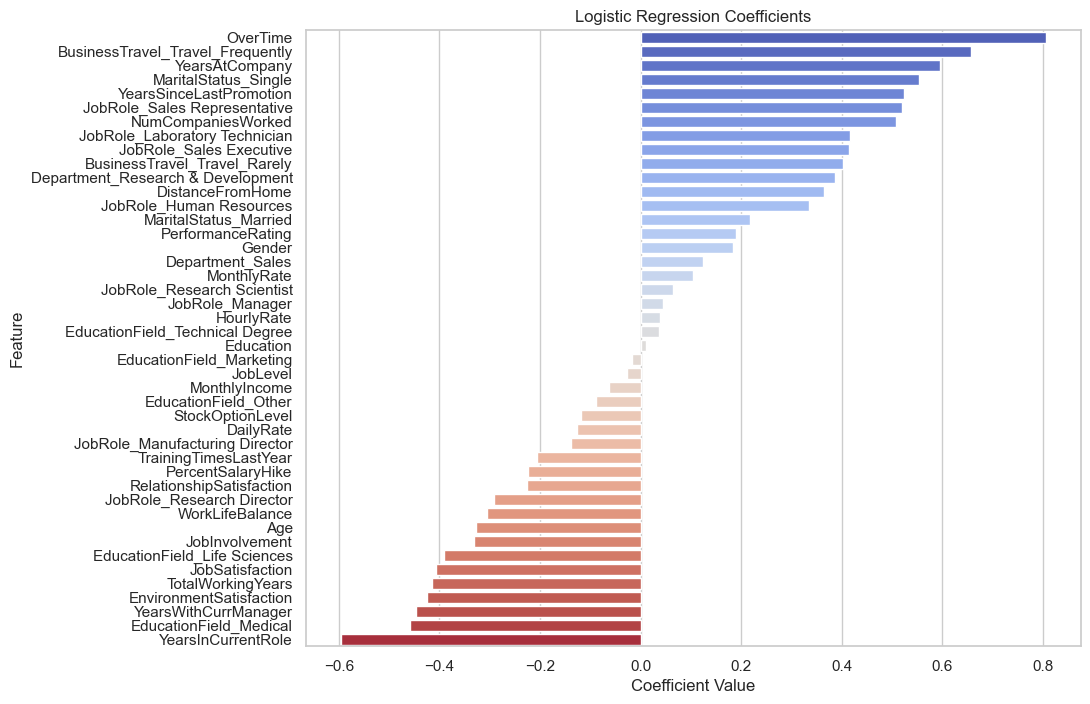

In [77]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients, palette='coolwarm')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [70]:
# Plot ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


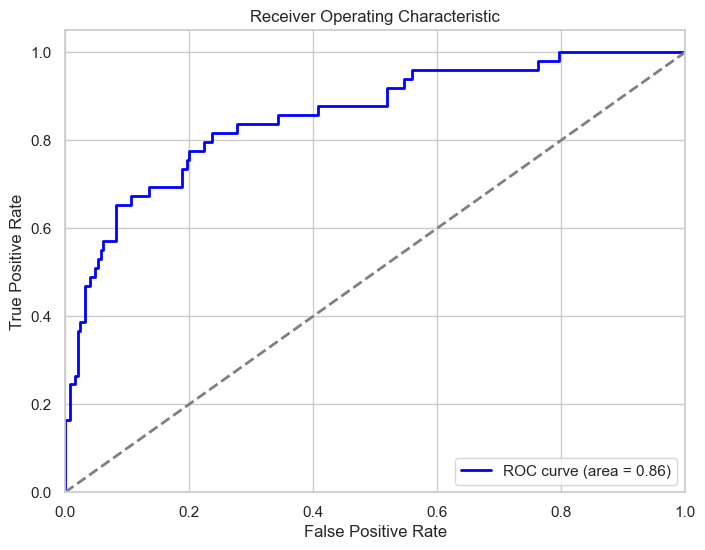

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()